<a href="https://colab.research.google.com/github/anamumaq/noticiaselecciones2021/blob/main/noticiaselecciones2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pygooglenews

In [ ]:
from pygooglenews import GoogleNews
import pandas as pd
pd.set_option("display.max_columns", None)

In [ ]:
## busqueda de los top news  en español de peru
## no se puede buscar un topico en tops
gn = GoogleNews(lang = 'sp', country = "PE")
tops = gn.top_news(proxies = None, scraping_bee = None)['entries']
result = pd.DataFrame.from_dict(tops)
print(result.describe())

In [201]:
## busqueda general de la palabra y el medio
gn = GoogleNews(lang = 'sp',country = "PE")
kf_r = gn.search('keiko+fujimori+la+republica', when = '1d')['entries']
kf_r = pd.DataFrame.from_dict(kf_r)

kf_p = gn.search('keiko+fujimori+la+peru+21', when = '1d')['entries']
kf_p = pd.DataFrame.from_dict(kf_p)

kf_c = gn.search('keiko+fujimori+el+comercio', when = '1d')['entries']
kf_c = pd.DataFrame.from_dict(kf_c)

kf_g = gn.search('keiko+fujimori+gestion', when = '1d')['entries']
kf_g = pd.DataFrame.from_dict(kf_g)

kf_rpp = gn.search('keiko+fujimori+rpp', when = '1d')['entries']
kf_rpp = pd.DataFrame.from_dict(kf_rpp)

kf_e = gn.search('keiko+fujimori+exitosa', when = '1d')['entries']
kf_e = pd.DataFrame.from_dict(kf_g)

kf_a = gn.search('keiko+fujimori+andina', when = '1d')['entries']
kf_a = pd.DataFrame.from_dict(kf_a)

kf = pd.concat([kf_r, kf_p, kf_c, kf_g, kf_rpp, kf_e, kf_a], ignore_index = True)


In [202]:
#cambiar el nombre de las columnas al resultado
kf.columns = ['titulo','titulo_d','links','link','id','guilink','publicado','publicado parc', 'resumen','resumen detalle','recurso','sub artc']


In [203]:
# selecciono solo las columnas que me interesan para el analisis
columnas = ['titulo',"publicado","recurso"]
kf = kf[columnas]
kf = kf.drop_duplicates()
kf = kf.astype('str')


In [ ]:
# ver como esta compuesta recurso
print(kf.recurso[1])

In [ ]:
# composicion de titulo
print(kf.titulo[1])

In [ ]:
print(kf)

In [181]:
# separo recurso en 9 parte porque son las veces que se partira por '
n = kf["recurso"].str.split("'", n = 9, expand = True)
t = kf["titulo"].str.split("-", n = 1, expand = True)

In [ ]:
print(t.head())

In [182]:
# uso la 7ma columna que es la que tiene el nombre del medio
kf["web"] = n[7]
kf["articulo"] = t[0]

In [183]:
# borro la columna recurso porque ya no la usare
kf.drop(columns =['recurso',"titulo"], inplace = True)

In [ ]:
# prueba a ver que tal queda
print(kf.head())

In [155]:
# wordcloud pa ver que tal
# importing all necessery modules
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
comment_words = ''
#stopwords = set(STOPWORDS)


stop_words_sp = set(stopwords.words('spanish'))
stop_words = ["Perú"] + list(stop_words_sp)

for val in kf.articulo:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stop_words,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

Articulos sobre VM

In [205]:
## busqueda general de la palabra y el medio VM
gn = GoogleNews(lang = 'sp',country = "PE")
tiempo = '1m'

vm_r = gn.search('veronika+mendoza+la+republica', when = '3d')['entries']
vm_r = pd.DataFrame.from_dict(vm_r)

vm_p = gn.search('veronika+mendoza+la+peru+21', when = '3d')['entries']
vm_p = pd.DataFrame.from_dict(vm_p)

vm_c = gn.search('veronika+mendoza+el+comercio', when = '3d')['entries']
vm_c = pd.DataFrame.from_dict(vm_c)

vm_g = gn.search('veronika+mendoza+gestion', when = '3d')['entries']
vm_g = pd.DataFrame.from_dict(vm_g)

vm_rpp = gn.search('veronika+mendoza+rpp', when = '3d')['entries']
vm_rpp = pd.DataFrame.from_dict(vm_rpp)

vm_e = gn.search('veronika+mendoza+exitosa', when = '3d')['entries']
vm_e = pd.DataFrame.from_dict(vm_g)

vm_a = gn.search('veronika+mendoza+andina', when = '3d')['entries']
vm_a = pd.DataFrame.from_dict(vm_a)

vm = pd.concat([vm_r, vm_p, vm_c, vm_g, vm_rpp, vm_e, vm_a], ignore_index = True)


In [206]:
vm.columns = ['titulo','titulo_d','links','link','id','guilink','publicado','publicado parc', 'resumen','resumen detalle','recurso','sub artc']
columnas = ['titulo',"publicado","recurso"]
vm = vm[columnas]
vm = vm.drop_duplicates()
vm = vm.astype('str')
n = vm["recurso"].str.split("'", n = 9, expand = True)
t = vm["titulo"].str.split("-", n = 1, expand = True)
vm["web"] = n[7]
vm["articulo"] = t[0]
vm.drop(columns =['recurso',"titulo"], inplace = True)


In [ ]:
comment_words = ''
#stopwords = set(STOPWORDS)


stop_words_sp = set(stopwords.words('spanish'))
stop_words = ["Perú"] + list(stop_words_sp)

for val in vm.articulo:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stop_words,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

OTRAS PRUEBAS PARA OPTIMIZAR

In [266]:
gn = GoogleNews(lang = 'sp',country = "PE")
tiempo = '3d'

la = gn.search('lopez+aliaga' or 'rafael+lopez'or'renovacion+poplular', when = tiempo)['entries']
la = pd.DataFrame.from_dict(la)

In [267]:
la.columns = ['titulo','titulo_d','links','link','id','guilink','publicado','publicado parc', 'resumen','resumen detalle','recurso','sub artc']
columnas = ['titulo',"publicado","recurso"]
la = la[columnas]
la = la.drop_duplicates()
la = la.astype('str')
n = la["recurso"].str.split("'", n = 9, expand = True)
t = la["titulo"].str.split("-", n = 1, expand = True)
la["web"] = n[7]
la["articulo"] = t[0]
la.drop(columns =['recurso',"titulo"], inplace = True)

In [ ]:
print(la)

In [268]:
print(la.describe())

                            publicado             web  \
count                             100             100   
unique                            100              33   
top     Mon, 29 Mar 2021 17:08:48 GMT  Expreso (Perú)   
freq                                1              17   

                                                 articulo  
count                                                 100  
unique                                                100  
top     Elecciones 2021: duplas, fechas y bloques del ...  
freq                                                    1  


In [ ]:
#print(vm.web.count())
la.groupby('web').count()


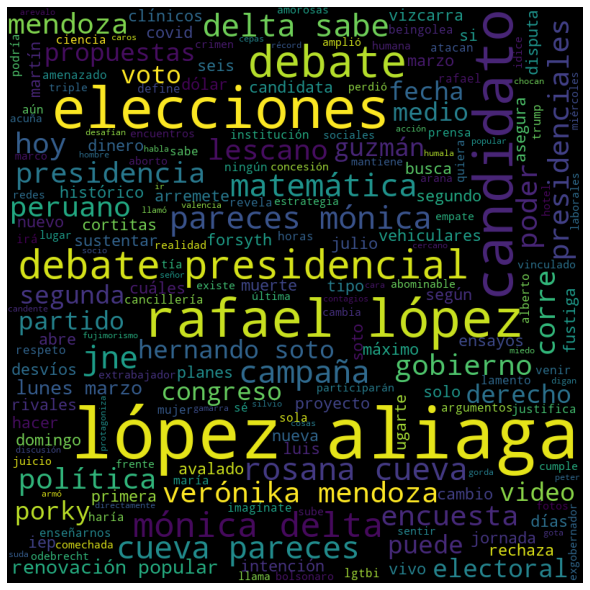

In [270]:
comment_words = ''
#stopwords = set(STOPWORDS)


stop_words_sp = set(stopwords.words('spanish'))
stop_words = ["Perú"] + list(stop_words_sp)

for val in la.articulo:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stop_words,
                min_font_size = 10).generate(comment_words)
  
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()